## Многкритериальная оптимизация

In [308]:
!pip install opencv-python
!pip install PyQt5

     ---------------------------------------- 6.7/6.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 77.7/77.7 kB 865.1 kB/s eta 0:00:00


In [2]:
import pandas as pds
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from turtle import *

In [5]:
def pretty_table(data, cell_sep=' | ', header_separator=True) -> str:
    rows = len(data)
    cols = len(data[0])

    col_width = []
    for col in range(cols):
        columns = [str(data[row][col]) for row in range(rows)]
        col_width.append(len(max(columns, key=len)))

    separator = "-+-".join('-' * n for n in col_width)

    lines = []

    for i, row in enumerate(range(rows)):
        result = []
        for col in range(cols):
            item = str(data[row][col]).rjust(col_width[col])
            result.append(item)

        lines.append(cell_sep.join(result))

        if i == 0 and header_separator:
            lines.append(separator)

    return '\n'.join(lines)

def radar_factory(num_vars, frame='circle'):
    """

    """
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=0.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))

                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def hello():
        left(90)
        pensize(10)
        penup()
        forward(100)
        pendown()
        pencolor("red")
        begin_fill()
        circle(70,230)
        pensize(10)
        pencolor("red")

        pencolor("red",)
        forward(140)
        seth(40)
        forward(135)
        pencolor("red")
        right(5)
        circle(70,210)
        pencolor("black")

        seth(30)
        fillcolor("red")
        end_fill()
        seth(-90)
        pencolor("red")
        pensize(3)
        forward(50)
        pencolor("black")


        hideturtle()
        done()
        
        img = plt.imread('opt.jpg')
        plt.imshow(img)
        plt.show()
        
        
class opt:
    '''
    Данный класс содержит следующие функции:
    for_two_criteria - функция свертки для двух основных критерий.
        в параметры задаются значения: 
            а1 (пока что), по умолчанию там значения от 1 до 0 с шагом 0.1
            criteria - номера столбцов критериев, по умолчанию там стоят первые два столбца
    for_all - свертка для всех критериев
        в параметры задаются значения:
            relevance - значения для каждого критерия
        '''

    def __init__(self, data, max_min):
        self.data = pds.read_csv(data, decimal=',', sep=';')
        self.max_min = max_min
        self.name_list = self.data.columns.tolist()
    
    def example(self):
        data = [
            ["название предмета оптимизации", "Критерий 1"],
            {"Предмет 1": 0, "Предмет 2": 0, "Предмет 3": 0}
        ]
        rows = [
            data[0]
        ]
        rows += [(k, v) for k, v in data[1].items()]
        print(pretty_table(rows))
        
    def criteria_names(self):
        df = self.data.copy()
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        k = 1
        for i in criteria_names:
            print('Критерий №{}:{} '.format(k,i))
            k+=1
 
    def names(self):
        df = self.data.copy()
        names = df.iloc[:,0].tolist()
        
        return(names)
        
    def for_two_criteria(self, a1=[i/10 for i in range(10, -1, -1)], criteria = [1,2]):
            
        max_min=[]
        for i in criteria:
            for x in range(len(self.max_min)):
                if i == x+1:
                    max_min.append(self.max_min[x])
        
        a2 = [1 - i for i in a1]
        df = self.data.copy()
        names = df.iloc[:,0].tolist()
        criteria_names = df.columns.tolist()
        a,b=df.shape[0],df.shape[1]
        x1 = df.iloc[:,criteria[0]].tolist()
        x2 = df.iloc[:,criteria[1]].tolist()
        
        main_list = []
        
        for e in range(len(x1)):
            inner_list = []
            for i in range(len(a1)):
                if max_min[0] == 0 and max_min[1] == 0:
                    inner_list.append(a1[i]*x1[e] + a2[i]*x2[e])
                elif max_min[0] == 0 and max_min[1] == 1:
                    inner_list.append(a1[i]*x1[e] - a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 0:
                    inner_list.append(-(a1[i]*x1[e]) + a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 1:
                    inner_list.append(-(a1[i]*x1[e]) - a2[i]*x2[e])

            main_list.append(inner_list)
        df1 = pds.DataFrame(main_list)
        max_df = df1.max(axis = 0) 
        df1.loc[a] = max_df
        df1.rename(index={a:'max'})
        skam = opt.names(self)
        skam.append('max')
        index_ = [f'{i}'for i in skam] 
        df1.index = index_  
        
        
        print('\nДатафрейм, полученный после свертки введенных данных:\n')
        return(df1)

    def for_all(self, relevance = []):

        df = self.data.copy()
        main_list = []
        a,b=df.shape[0],df.shape[1]
       
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        
        k = 1
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        df_main_list = pds.DataFrame(main_list)
        df_main_list = df_main_list.T
        
        
        diagramm_list = []
    
        for i in range(len(main_list)):
            diagramm_list.append(df_main_list.iloc[i].tolist())
    
            
        df_values = pds.DataFrame(main_list)
        df_values = df_values.T
        min_values = df_values.min(axis=0).tolist()
        
        count_list = []
        for i in min_values:
            count_list.append(len(str(i)))
        
        normalized_list=[]
        for en, i in enumerate(count_list):
            normalized_list.append((relevance[en]/sum(relevance))/10**(i-1))

        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        collapse_list = []
        for i in range(len(df.iloc[:,1:])):
            collapse_list.append(df.iloc[i].tolist())
            
        for i in collapse_list:
            i.pop(0)
        
        mostik = []
        for i in self.max_min:
            if i == 0:
                i = 1
                mostik.append(i)
            elif i == 1:
                i = -1
                mostik.append(i)
        mostiklst = [a*b for a,b in zip(mostik,normalized_list)]
        
        multiply_list = []
        for i in collapse_list:
            inner_list=[]
            for en, e in enumerate(i):
                inner_list.append(e*mostiklst[en])
            multiply_list.append(inner_list)
        
        final_list = []
        for i in multiply_list:
            final_list.append(sum(i))
        df_rel = pds.DataFrame(final_list, opt.names(self), columns = ['свертка'])
        text =  display(df_rel.style.highlight_max(subset = 'свертка',color = 'lightgreen', axis = 0))
        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', diagramm_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

    
        print(f'Оптимальная дисциплина со значением: {df_rel.свертка.max()}')
        plt.show()
        return(text)
  
    
    def ideal_dot(self):
        max_min = self.max_min

        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        max_df = df.max(axis=0)
       
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        
        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        max_list=[]
        for en, i in enumerate(main_list):
            for x in range(len(max_min)):
                if en == x and max_min[en]==0:
                    max_list.append(max(i)*1.1)
                elif en == x and max_min[en]==1:
                    max_list.append(min(i)*0.9)
        sub_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (max_list[i]-x)/max_list[i]))
                        sub_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/((x-max_list[i])/max_list[i]))))
                        sub_list.append(inner_list)
                s+=1
                
                
        df_sub = pds.DataFrame(sub_list)
        df_sub = df_sub.T
        
        diagramm_list = []
    
        for i in range(len(main_list)):
            diagramm_list.append(df_sub.iloc[i].tolist())
            
        square_list = []
        o = 0
        while o<=a-1: 
            inner_list = list(df_sub.iloc[o].map(lambda x: x**2))
            square_list.append(inner_list)
            o+=1
        df_square = pds.DataFrame(square_list,opt.names(self))
        sum_df = df_square.sum(axis=1)    

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', diagramm_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_rgrids([0, 1, 2.0, 3.0, 4.0, 5.0, 6])
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

        plt.show()
        
        print('Расстояние каждого предмета: ')
        display(sum_df)
    def benchmark(self, benchmark_list = [500,50,40,100,300]):        
        max_min = self.max_min
        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)

        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1

        control_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (x/benchmark_list[i])))
                        control_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/(x/benchmark_list[i]))))
                        control_list.append(inner_list)
                s+=1
                
        df_control = pds.DataFrame(control_list)
        df_control = df_control.T
        
        diagramm_list = []
        
        for i in range(len(opt.names(self))):
            diagramm_list.append(df_control.iloc[i].tolist())
            
                
        df_filter = pds.DataFrame(diagramm_list)
                
        final_list=[]
        for i in diagramm_list:
            if min(i) < 1:
                final_list.append('NA')
            elif min(i) >= 1:
                final_list.append(min(i))
        
        max_list = [i for i in final_list if type(i) == float]

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', diagramm_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)
        
        print('Полученные предметы прошедшие контрольные показатели\n')
        f = display(pds.DataFrame(final_list, opt.names(self), columns = ['расстояние']))
        plt.show()
        return(f)

Вас приветствует программа по оптимизации!

Введите название CSV-файла в формате "name.csv", дорогой пользователь:

opt.csv
Введите к максимуму или к минимуму стремится каждый критерий (через запятую)
(0-по максимуму)
(1-по минимуму):

Направления (через запятую):
0,1,0,0,0,0,0,0
ВАЖНО! Формат файла должен выглядеть так:

название предмета оптимизации | Критерий 1
------------------------------+-----------
                    Предмет 1 |          0
                    Предмет 2 |          0
                    Предмет 3 |          0

Номера ваших критериев:

Критерий №1:Полезность дисцпилины 
Критерий №2:Сложность дисциплины 
Критерий №3:Часы семинских занятий 
Критерий №4:Часы лекционных занятий 
Критерий №5:Часы самостоятельной работы 
Критерий №6:Количество практико-ориентированных работ 
Критерий №7:Актуальность 
Критерий №8:Количество теоретических работ 

Какую программу вы хотите запустить?
    1) Линейная свертка для двух основных критериев
    2) Линейная свертка для все крите

,0,1,2,3,4,5,6,7,8,9,10
Информационные системы управления организацией,9.0,7.3,5.6,3.9,2.2,0.5,-1.2,-2.9,-4.6,-6.3,-8.0
Экономика информационных систем,7.0,5.7,4.4,3.1,1.8,0.5,-0.8,-2.1,-3.4,-4.7,-6.0
Архитектура организации,9.0,7.4,5.8,4.2,2.6,1.0,-0.6,-2.2,-3.8,-5.4,-7.0
Управление информационно-технологическими проектами,8.0,6.3,4.6,2.9,1.2,-0.5,-2.2,-3.9,-5.6,-7.3,-9.0
Информационные технологии бизнес аналитики,8.0,6.5,5.0,3.5,2.0,0.5,-1.0,-2.5,-4.0,-5.5,-7.0
Основы управления ИТ-сервисами,6.0,4.8,3.6,2.4,1.2,0.0,-1.2,-2.4,-3.6,-4.8,-6.0
Основы управления информационными технологиями,7.0,5.8,4.6,3.4,2.2,1.0,-0.2,-1.4,-2.6,-3.8,-5.0
Информационная безопасность,8.0,6.4,4.8,3.2,1.6,0.0,-1.6,-3.2,-4.8,-6.4,-8.0
Цифровой бизнес,6.0,4.8,3.6,2.4,1.2,0.0,-1.2,-2.4,-3.6,-4.8,-6.0
Мобильные технологии,8.0,6.3,4.6,2.9,1.2,-0.5,-2.2,-3.9,-5.6,-7.3,-9.0



Введите значимость для критериев в соответствие с номером критерия (через запятую):


Значимости критериев (через запятую):
8,6,7,2,3,5,9,4


,свертка
Информационные системы управления организацией,5.668182
Экономика информационных систем,5.686364
Архитектура организации,6.300000
Управление информационно-технологическими проектами,5.840909
Информационные технологии бизнес аналитики,4.468182
Основы управления ИТ-сервисами,4.954545
Основы управления информационными технологиями,6.027273
Информационная безопасность,5.500000
Цифровой бизнес,6.531818
Мобильные технологии,4.545455


Оптимальная дисциплина со значением: 6.531818181818181


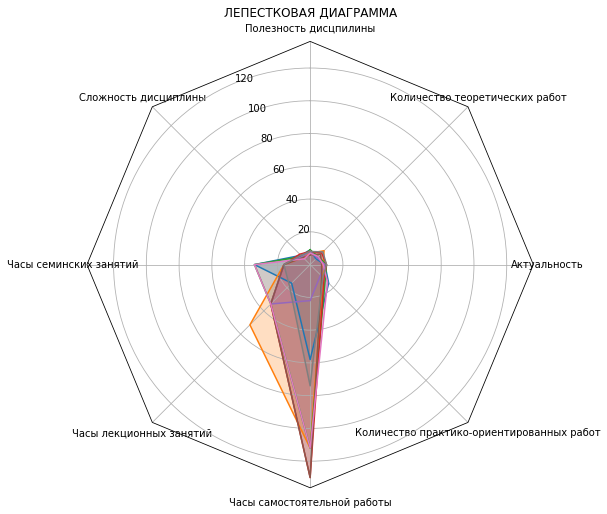

None

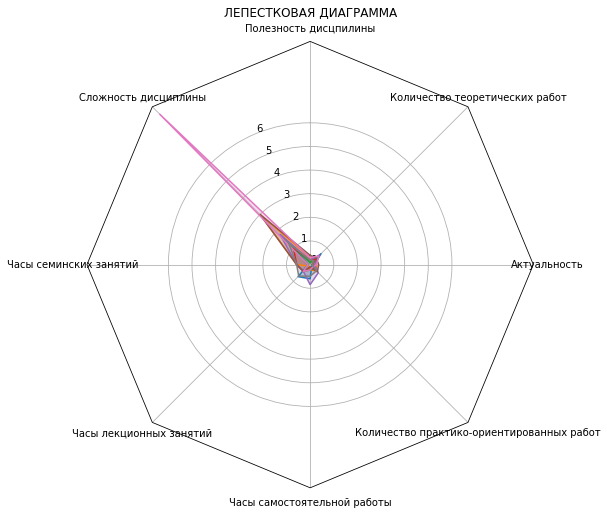

Расстояние каждого предмета: 


Информационные системы управления организацией          3.013331
Экономика информационных систем                         9.714632
Архитектура организации                                 3.810492
Управление информационно-технологическими проектами     1.739627
Информационные технологии бизнес аналитики              5.097381
Основы управления ИТ-сервисами                         10.114122
Основы управления информационными технологиями         81.667663
Информационная безопасность                             2.929550
Цифровой бизнес                                         9.305330
Мобильные технологии                                    2.599016
Основы технологий интернета вещей                      82.758693
dtype: float64

None

Введите контрольные показатели для каждого критерия(через запятую):
5,10,20,15,20,5,6,3
Полученные предметы прошедшие контрольные показатели



,расстояние
Информационные системы управления организацией,1.066667
Экономика информационных систем,NA
Архитектура организации,1.428571
Управление информационно-технологическими проектами,NA
Информационные технологии бизнес аналитики,NA
Основы управления ИТ-сервисами,NA
Основы управления информационными технологиями,1.333333
Информационная безопасность,NA
Цифровой бизнес,1.2
Мобильные технологии,NA


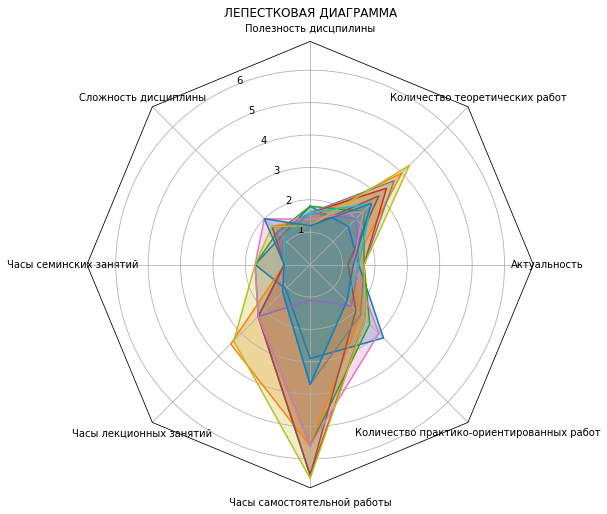

None

In [9]:
print('Вас приветствует программа по оптимизации!\n')
try:
    hello()
except Terminator:
    pass

file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')

print('Введите к максимуму или к минимуму стремится каждый критерий (через запятую)\n(0-по максимуму)\n(1-по минимуму):\n')
max_list = input('Направления (через запятую):\n')
maxx = max_list.split(',')
max_min_list = [int(i) for i in maxx]
o = opt(data=file, max_min=max_min_list)
try:
    o = opt(data=file, max_min=max_min_list)
except FileNotFoundError:
    print('Вы указали неверный путь к файлу!')
print('ВАЖНО! Формат файла должен выглядеть так:\n')
o.example()
print('\nНомера ваших критериев:\n')
o.criteria_names()

programm_num = int(input('''
Какую программу вы хотите запустить?
    1) Линейная свертка для двух основных критериев
    2) Линейная свертка для все критериев
    3) Метод идеальной точки
    4) Метод контрольных показателей
    5) Все методы оптимизации\n'''))
if programm_num == 1:
    print('Выберите критерии для свертки:\n ', )
    crit_num = input('Номера критериев (через запятую):\n')
    x = crit_num.split(',',2)
    crit_list = [int(i) for i in x]
    display(o.for_two_criteria(criteria=crit_list))
elif programm_num ==2:
    print('\nВведите значимость для критериев в соответствие с номером критерия (через запятую):\n\n')
    rel = input('Значимости критериев (через запятую):\n')
    x = rel.split(',')
    rel_list = [float(i) for i in x]
    display(o.for_all(relevance=rel_list))
elif programm_num==3:
    print(o.ideal_dot())
elif programm_num==4:
    print('\nВведите контрольные показатели для каждого критерия:\n')
    benchmark_lst=[]
    for i in range(len(o.name_list)-1):
        print('Для критерия №{}'.format(i+1))
        benchmark_lst.append(int(input()))
    display(o.benchmark(benchmark_list=benchmark_lst))
elif programm_num ==5:
    print('Выберите критерии для свертки:\n\n', )
    crit_num = input('Номера критериев (через запятую):\n')
    x = crit_num.split(',',2)
    crit_list = [int(i) for i in x]
    display(o.for_two_criteria(criteria=crit_list))
    print('\nВведите значимость для критериев в соответствие с номером критерия (через запятую):\n\n')
    rel = input('Значимости критериев (через запятую):\n')
    x = rel.split(',')
    rel_list = [float(i) for i in x]
    display(o.for_all(relevance=rel_list))
    print(o.ideal_dot())
    pok = input('\nВведите контрольные показатели для каждого критерия(через запятую):\n')
    pokk = pok.split(',')
    benchmark_lst = [float(i) for i in pokk]
    display(o.benchmark(benchmark_list=benchmark_lst))